In [1]:
import pandas as pd

# package from github repo https://github.com/Jefferson-Henrique/GetOldTweets-python

import datetime

In [14]:
import re
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
import string
import nltk
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

%matplotlib inline

In [92]:
from nltk.corpus import stopwords

In [93]:
print(stopwords.words("english"))

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [2]:
! pwd

/Users/john/Desktop/capstone_project/gather


In [3]:
def query_hist(query, start_date, end_date):
    tweet_criteria = got.manager.TweetCriteria().setQuerySearch(query).setSince(start_date).setUntil(end_date)
    tweets = got.manager.TweetManager.getTweets(tweet_criteria)

    for i in range(len(tweets)):
        d = {'index':tweets[i].date, 'text':tweets[i].text, 'id':tweets[i].id, 'username':tweets[i].username,
             'retweets':tweets[i].retweets, 'favorites':tweets[i].favorites,  'mentions':tweets[i].mentions,
             'hashtags':tweets[i].hashtags, 'geo':tweets[i].geo, 'permalink':tweets[i].permalink}
        if i == 0:
            df = pd.DataFrame.from_dict(d,orient='index').T
            df.index = df['index']
            df = df.drop('index', axis=1)
        else:
            df2 = pd.DataFrame.from_dict(d,orient='index').T
            df2.index = df2['index']
            df2 = df2.drop('index', axis=1)
            df = df.append(df2)

    
    return df

In [4]:
query = '#alicaldwell'
start_date = '2018-05-01'
end_date = '2018-08-31'

In [6]:
hashtag_ali_caldwell = query_hist(query, start_date, end_date)
hashtag_ali_caldwell.head()

,text,id,username,retweets,favorites,mentions,hashtags,geo,permalink
index,,,,,,,,,
2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031879656...
2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031849525...
2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,,0,0,@TheFourOnFOX,#AliCaldwell,,https://twitter.com/lovettstough/status/103138...
2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,,https://twitter.com/iamAliCaldwell/status/1030...
2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,,https://twitter.com/bloodyhellp/status/1030390...


In [7]:
query = '#thefour AND "ali caldwell"'
start_date = '2018-05-01'
end_date = '2018-08-31'

In [8]:
thefour_ali_caldwell = query_hist(query, start_date, end_date)
thefour_ali_caldwell.head()

,text,id,username,retweets,favorites,mentions,hashtags,geo,permalink
index,,,,,,,,,
2018-08-30 17:15:42,Sharaya J was robbed. #TheFour Ali Caldwell wa...,1035274887508779009,,0,0,,#TheFour,,https://twitter.com/YetundeNaija/status/103527...
2018-08-24 04:53:18,"At 4:53 am...a thought came to my head, and th...",1032913729787256837,,1,2,,#TheFour,,https://twitter.com/Introverted_Gem/status/103...
2018-08-24 00:54:05,I’m shocked that @iamAliCaldwell Lost her seat...,1032853528685899776,,0,0,@iamAliCaldwell @YouTube,#TheFour,,https://twitter.com/MoustafaHadary/status/1032...
2018-08-20 05:04:19,L'interprétation de ''somebody loves You'' par...,1031466952789774336,,1,1,,#TheFour,,https://twitter.com/GNgatch/status/10314669527...
2018-08-07 17:52:40,Damn Ali Caldwell can sing her ass off #thefour,1026949271730499585,,0,0,,#thefour,,https://twitter.com/__youreWelcome_/status/102...


In [9]:
print(hashtag_ali_caldwell.shape)
print(thefour_ali_caldwell.shape)

(386, 9)
(393, 9)


In [11]:
# Save these queries to csv's
# hashtag_ali_caldwell.to_csv('hashtag_ali_caldwell.csv', index=False)
# thefour_ali_caldwell.to_csv('thefour_ali_caldwell.csv', index=False)

In [12]:
twitter_media = pd.concat([hashtag_ali_caldwell, thefour_ali_caldwell])

In [13]:
twitter_media.groupby('permalink')['id'].count()

permalink
https://twitter.com/143AJTuason/status/1025358580290007040        1
https://twitter.com/1DERWOMAN43/status/1017586881649893376        1
https://twitter.com/1DERWOMAN43/status/1022638805495570432        1
https://twitter.com/1originalbree/status/1025173089292828672      1
https://twitter.com/2GetHerUnited/status/1017637506081263616      1
https://twitter.com/2ladyle/status/1022640922541150209            1
https://twitter.com/3TTau/status/1022918870192070656              1
https://twitter.com/4EVERATROJAN/status/1020144613309509632       1
https://twitter.com/808Cami206/status/1023833593158586369         1
https://twitter.com/808Cami206/status/1023836828846022656         1
https://twitter.com/AbelandCain2016/status/1012722165358084096    1
https://twitter.com/AdeleUnion/status/1013058819226648576         1
https://twitter.com/AdwinCaban/status/1012710322245918720         1
https://twitter.com/Aguiilitaa/status/1022646004720590848         1
https://twitter.com/Aguiilitaa/status/

This concatetenated dataframe does not have any duplicate tweets

In [15]:
twitter_media = twitter_media.reset_index()
# twitter_media.to_csv('twitter_media.csv', index=False)

- Change index to datetime
- parse text columns...rename to tweet_text
- rename id to tweet_id
- username seems to be empty ???
- parse mentions
- parse hashtags
- check for any geo locations
- do we need permalink?

In [16]:
twitter_media.head()

,level_0,index,text,id,username,retweets,favorites,mentions,hashtags,geo,permalink
0,0,2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031879656...
1,1,2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031849525...
2,2,2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,,0,0,@TheFourOnFOX,#AliCaldwell,,https://twitter.com/lovettstough/status/103138...
3,3,2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,,https://twitter.com/iamAliCaldwell/status/1030...
4,4,2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,,https://twitter.com/bloodyhellp/status/1030390...


Extract username from permalink

In [55]:
tweet_urls = twitter_media['permalink'].copy()
twitter_media.head()

,index,text,id,username,retweets,favorites,mentions,hashtags,geo,permalink
0,2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031879656...
1,2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031849525...
2,2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,,0,0,@TheFourOnFOX,#AliCaldwell,,https://twitter.com/lovettstough/status/103138...
3,2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,,https://twitter.com/iamAliCaldwell/status/1030...
4,2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,,https://twitter.com/bloodyhellp/status/1030390...


In [56]:
tweet_urls.str.split('/')[0][3]

'fanseize'

In [57]:
def get_usernames(links):
    return link.split('/')

In [58]:
tweet_urls[0].split('/')[3]

'fanseize'

In [59]:
usernames = [i.split('/')[3] for i in tweet_urls]

In [62]:
twitter_media['username'] = usernames

In [64]:
twitter_media.head()

,index,text,id,username,retweets,favorites,mentions,hashtags,geo,permalink
0,2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,fanseize,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031879656...
1,2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,fanseize,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031849525...
2,2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,lovettstough,0,0,@TheFourOnFOX,#AliCaldwell,,https://twitter.com/lovettstough/status/103138...
3,2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,iamAliCaldwell,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,,https://twitter.com/iamAliCaldwell/status/1030...
4,2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,bloodyhellp,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,,https://twitter.com/bloodyhellp/status/1030390...


Convert time to datetime

In [68]:
twitter_media['index'] = pd.to_datetime(twitter_media['index'])

In [74]:
cols = {'index':'tweet_timestamp', 
        'text':'tweet', 
        'id':'tweet_id', 
        'username':'username', 
        'retweets':'retweets', 
        'favorites':'favorites', 
        'hashtags':'hashtags', 
        'geo':'location', 
        'permalink':'tweet_url'}

In [78]:
twitter_media = twitter_media.rename(columns=cols)

In [79]:
# twitter_media.to_csv('twitter_media.csv', index=False)
twitter_media

,tweet_timestamp,tweet,tweet_id,username,retweets,favorites,mentions,hashtags,location,tweet_url
0,2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,fanseize,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031879656...
1,2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,fanseize,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,,https://twitter.com/fanseize/status/1031849525...
2,2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,lovettstough,0,0,@TheFourOnFOX,#AliCaldwell,,https://twitter.com/lovettstough/status/103138...
3,2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,iamAliCaldwell,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,,https://twitter.com/iamAliCaldwell/status/1030...
4,2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,bloodyhellp,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,,https://twitter.com/bloodyhellp/status/1030390...
5,2018-08-13 15:33:30,I simply refuse to watch the #thefour ever aga...,1029088574342393856,miztumuch,0,2,,#thefour #AliCaldwell,,https://twitter.com/miztumuch/status/102908857...
6,2018-08-13 14:03:05,Tune in #RN ! We are live with Ali Caldwell! #...,1029065822738817024,bmi,0,3,@TheFourOnFOX,#RN #BMILIVE #ALICALDWELL #InstagramLive,,https://twitter.com/bmi/status/102906582273881...
7,2018-08-12 16:00:26,I will be taking over @bmi Instagram Live tomo...,1028732963989676032,iamAliCaldwell,5,30,@bmi,#Aug13th #AliCaldwell #BMI #2MaroMedia #2MaroM...,,https://twitter.com/iamAliCaldwell/status/1028...
8,2018-08-11 12:18:33,@iamAliCaldwell #Alicaldwell #AliCaldwellFans ...,1028314737250066432,Ali_s_AliKats,3,14,@iamAliCaldwell,#Alicaldwell #AliCaldwellFans,,https://twitter.com/Ali_s_AliKats/status/10283...
9,2018-08-10 22:17:14,http://www. NOCTURNALVIBESRADIO.com #Nocturnal...,1028103014970806272,RICHVOICE,0,1,,#NocturnalVibes #NocturnalVibesRadio #SmoothTa...,,https://twitter.com/RICHVOICE/status/102810301...


In [63]:
df = pd.read_csv('twitter_media.csv')

In [64]:
df

,tweet_timestamp,tweet,tweet_id,username,retweets,favorites,mentions,hashtags,location,tweet_url
0,2018-08-21 08:24:16,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,fanseize,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031879656...
1,2018-08-21 06:24:32,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,fanseize,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031849525...
2,2018-08-19 23:54:23,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,lovettstough,0,0,@TheFourOnFOX,#AliCaldwell,NaN,https://twitter.com/lovettstough/status/103138...
3,2018-08-17 10:41:24,I had a fun interview during my @bmi Takeover ...,1030464616252538880,iamAliCaldwell,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,NaN,https://twitter.com/iamAliCaldwell/status/1030...
4,2018-08-17 05:48:47,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,bloodyhellp,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,NaN,https://twitter.com/bloodyhellp/status/1030390...
5,2018-08-13 15:33:30,I simply refuse to watch the #thefour ever aga...,1029088574342393856,miztumuch,0,2,NaN,#thefour #AliCaldwell,NaN,https://twitter.com/miztumuch/status/102908857...
6,2018-08-13 14:03:05,Tune in #RN ! We are live with Ali Caldwell! #...,1029065822738817024,bmi,0,3,@TheFourOnFOX,#RN #BMILIVE #ALICALDWELL #InstagramLive,NaN,https://twitter.com/bmi/status/102906582273881...
7,2018-08-12 16:00:26,I will be taking over @bmi Instagram Live tomo...,1028732963989676032,iamAliCaldwell,5,30,@bmi,#Aug13th #AliCaldwell #BMI #2MaroMedia #2MaroM...,NaN,https://twitter.com/iamAliCaldwell/status/1028...
8,2018-08-11 12:18:33,@iamAliCaldwell #Alicaldwell #AliCaldwellFans ...,1028314737250066432,Ali_s_AliKats,3,14,@iamAliCaldwell,#Alicaldwell #AliCaldwellFans,NaN,https://twitter.com/Ali_s_AliKats/status/10283...
9,2018-08-10 22:17:14,http://www. NOCTURNALVIBESRADIO.com #Nocturnal...,1028103014970806272,RICHVOICE,0,1,NaN,#NocturnalVibes #NocturnalVibesRadio #SmoothTa...,NaN,https://twitter.com/RICHVOICE/status/102810301...


In [66]:
df1=df
df1['tweet_timestamp']=df1['tweet_timestamp'].apply(lambda x: x[:10])
df1.head()

,tweet_timestamp,tweet,tweet_id,username,retweets,favorites,mentions,hashtags,location,tweet_url
0,2018-08-21,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,fanseize,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031879656...
1,2018-08-21,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,fanseize,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031849525...
2,2018-08-19,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,lovettstough,0,0,@TheFourOnFOX,#AliCaldwell,NaN,https://twitter.com/lovettstough/status/103138...
3,2018-08-17,I had a fun interview during my @bmi Takeover ...,1030464616252538880,iamAliCaldwell,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,NaN,https://twitter.com/iamAliCaldwell/status/1030...
4,2018-08-17,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,bloodyhellp,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,NaN,https://twitter.com/bloodyhellp/status/1030390...


In [15]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [18]:
# remove twitter handles (@user)
df1['tidy_tweet'] = np.vectorize(remove_pattern)(df1['tweet'], "@[\w]*")

In [20]:
df1.head()


,tweet_timestamp,tweet,tweet_id,username,retweets,favorites,mentions,hashtags,location,tweet_url,tidy_tweet
0,2018-08-21,RT @BoetPrince : RT @fanseize : RT @BoetPrince...,1031879656994160641,fanseize,1,1,@BoetPrince @fanseize @BoetPrince @iamAliCaldw...,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031879656...,RT : RT : RT : RT : It's Officially here! ...
1,2018-08-21,RT @BoetPrince : RT @iamAliCaldwell : It's Off...,1031849525932183552,fanseize,1,1,@BoetPrince @iamAliCaldwell @iamalicaldwell @vevo,#NewVideo #LINKINBIO #AliCaldwell #Bratislava ...,NaN,https://twitter.com/fanseize/status/1031849525...,RT : RT : It's Officially here! 's #NewVide...
2,2018-08-19,@TheFourOnFOX #AliCaldwell sounds like she is ...,1031388953394536451,lovettstough,0,0,@TheFourOnFOX,#AliCaldwell,NaN,https://twitter.com/lovettstough/status/103138...,#AliCaldwell sounds like she is doing karaoke...
3,2018-08-17,I had a fun interview during my @bmi Takeover ...,1030464616252538880,iamAliCaldwell,7,38,@bmi @bmi @ogrant10 @bmi,#BMILive #igtv #Alicaldwell #BMI #takeover #BM...,NaN,https://twitter.com/iamAliCaldwell/status/1030...,I had a fun interview during my Takeover day!...
4,2018-08-17,Give us new music to enjoy @iamAliCaldwell . S...,1030390979096801280,bloodyhellp,1,0,@iamAliCaldwell,#alicaldwell #thefour #thefourali,NaN,https://twitter.com/bloodyhellp/status/1030390...,Give us new music to enjoy . Sending love all...


In [21]:
#remobing punctuations, numbers and special characters

In [109]:
s = "how much for the maple syrup? $20.99? That's ridiculous!!!"
re.sub(r'[^\w]', ' ', s)


'how much for the maple syrup   20 99  That s ridiculous   '

In [95]:
df2=df1.groupby('tweet_id')


In [56]:
df1.sort_values('tweet_timestamp')

,index,tweet_timestamp
778,778,2018-05-08
777,777,2018-05-21
776,776,2018-06-08
775,775,2018-06-10
774,774,2018-06-11
773,773,2018-06-12
772,772,2018-06-26
771,771,2018-06-26
715,763,2018-06-28
716,770,2018-06-28


In [60]:
group = df1.groupby('tweet_timestamp')
for item in group:
    print(item)

('2018-05-08',      index tweet_timestamp
778    778      2018-05-08)
('2018-05-21',      index tweet_timestamp
777    777      2018-05-21)
('2018-06-08',      index tweet_timestamp
776    776      2018-06-08)
('2018-06-10',      index tweet_timestamp
775    775      2018-06-10)
('2018-06-11',      index tweet_timestamp
774    774      2018-06-11)
('2018-06-12',      index tweet_timestamp
773    773      2018-06-12)
('2018-06-26',      index tweet_timestamp
771    771      2018-06-26
772    772      2018-06-26)
('2018-06-28',      index tweet_timestamp
694    749      2018-06-28
695    748      2018-06-28
696    747      2018-06-28
697    746      2018-06-28
698    745      2018-06-28
699    744      2018-06-28
700    743      2018-06-28
701    742      2018-06-28
702    732      2018-06-28
703    741      2018-06-28
704    740      2018-06-28
705    739      2018-06-28
706    738      2018-06-28
707    737      2018-06-28
708    736      2018-06-28
709    735      2018-06-28
710    73

In [83]:
group.count()

,index
tweet_timestamp,
2018-05-08,1
2018-05-21,1
2018-06-08,1
2018-06-10,1
2018-06-11,1
2018-06-12,1
2018-06-26,2
2018-06-28,77
2018-06-29,16


In [8]:
df1['favorites'].describe()

count    779.000000
mean       5.911425
std       18.156521
min        0.000000
25%        0.000000
50%        1.000000
75%        3.000000
max      243.000000
Name: favorites, dtype: float64

In [9]:
df1['retweets'].describe()

count    779.000000
mean       1.229782
std        4.824939
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max       83.000000
Name: retweets, dtype: float64

In [10]:
import plotly
plotly.tools.set_credentials_file(username='johnnie2019', api_key='IboWLyJAyPBvSNzgcYLc')

In [11]:
import plotly.plotly as py
import plotly.graph_objs as go

data = [go.Bar(
            x=df1['tweet_timestamp'],
            y=df1['favorites']
    )]

py.iplot(data, filename='basic-bar')

High five! You successfully sent some data to your account on plotly. View your plot in your browser at https://plot.ly/~johnnie2019/0 or inside your plot.ly account where it is named 'basic-bar'


In [85]:
df2=df[df['favorites']>30]
df2['tweet']

3      I had a fun interview during my @bmi Takeover ...
51     Should’ve been the final four standing!!!! #PE...
168    @TheFourOnFOX #AliCaldwell hands down brought ...
189    Its no way #whitneyreign just beat #AliCaldwel...
199    #alicaldwell clearly THE FOUR IS NOT ABOUT SIN...
217    NOW YALL KNOW DAMN WELL #Alicaldwell #ali WON ...
223    Somebody please explain to me HOW IN THE WORLD...
233                         We all know #AliCaldwell won
240                         #AliCaldwell won that battle
247    #Alicaldwell got cheated for real though #TheFour
268    #READY for #TheFourComeback Episode WATCH @the...
270    Am I the only one who thinks there is an under...
271    I’m still SHOOK! There’s nobody touching @iamA...
275        chill #AliCaldwell pic.twitter.com/xfxLPWcJg7
298    Its here Guys! The Studio Recorded Version! "S...
349    DOWNLOAD & STREAM my Rendition of @Adele 's "S...
379    Here's the news people! I AUDITIONED for @thef...
381    Order your LIMITED EDITI

In [13]:
trace0 = go.Bar(
    x=df1['tweet_timestamp'],
    y=df1['retweets'],
    name='retweet',
    marker=dict(
        color='rgb(49,130,189)'
    )
)
trace1 = go.Bar(
    x=df1['tweet_timestamp'],
    y=df1['favorites'],
    name='favorites',
    marker=dict(
        color='rgb(204,204,204)',
    )
)

data = [trace0, trace1]
layout = go.Layout(
    xaxis=dict(tickangle=-45),
    barmode='group',
)

fig = go.Figure(data=data, layout=layout)
py.iplot(fig, filename='angled-text-bar')

In [37]:
import pandas as pd
%matplotlib inline

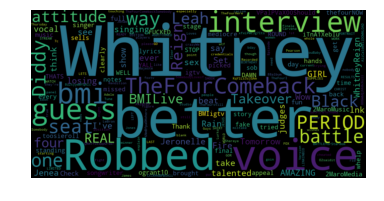

In [100]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
 
# Create a list of word
text=''.join(df2['tweet'])
 
# Create the wordcloud object
wordcloud = WordCloud(width=1000, height=500, margin=0, 
                      stopwords=stopwords.words("english") + ['AliCaldwell', 'TheFour','Ali Caldwell',
                                                             'pic', 'twitter', 'Ali', 
                                                              'Caldwell', 'Twitter', 'TheFourOnFOX', 
                                                              'com', 'got', 'know', 'TheFour', 
                                                              'would', 'https', 'www', 'iamalicaldwell',
                                                             'iAmAliCaldwell']).generate(text)
 
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.margins(x=0, y=0)
plt.show()